In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/ReviewRatings.csv')
dataset.head()

,User,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,...,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [3]:
dataset.isnull().sum()

User              0
Churches          0
Resorts           0
Beaches           0
Parks             0
Theatres          0
Museums           0
Malls             0
Zoo               0
Restaurants       0
Bars              0
Local Services    0
Fast Food         0
Lodgings          0
Juice Bars        0
Art Galleries     0
Dance Clubs       0
Swimming Pools    0
Gyms              0
Bakeries          0
Spas              0
Cafes             0
View Points       0
Monuments         0
Gardens           0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            5456 non-null   object 
 1   Churches        5456 non-null   float64
 2   Resorts         5456 non-null   float64
 3   Beaches         5456 non-null   float64
 4   Parks           5456 non-null   float64
 5   Theatres        5456 non-null   float64
 6   Museums         5456 non-null   float64
 7   Malls           5456 non-null   float64
 8   Zoo             5456 non-null   float64
 9   Restaurants     5456 non-null   float64
 10  Bars            5456 non-null   float64
 11  Local Services  5456 non-null   float64
 12  Fast Food       5456 non-null   float64
 13  Lodgings        5456 non-null   float64
 14  Juice Bars      5456 non-null   float64
 15  Art Galleries   5456 non-null   float64
 16  Dance Clubs     5456 non-null   float64
 17  Swimming Pools  5456 non-null   f

In [5]:
x = dataset.drop(columns=['User'])

In [6]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-1.75911777, -1.6320937 ,  0.91421654, ..., -1.09505221,
        -1.16303953, -1.33211789],
       [-1.75911777, -1.6320937 ,  0.91421654, ..., -1.09505221,
        -1.16303953, -1.33211789],
       [-1.75911777, -1.6320937 ,  0.91421654, ..., -1.09505221,
        -1.16303953, -1.33211789],
       ...,
       [-0.6232054 ,  1.88579429,  1.23480615, ...,  2.03270857,
         2.63413607, -0.38466551],
       [-0.61112123,  1.21739557,  1.25083563, ...,  2.03270857,
         2.63413607, -0.37612991],
       [-0.61112123,  1.23146712,  2.01223593, ...,  2.03270857,
         2.63413607, -0.33345187]])

In [7]:
# Elbow method

from sklearn.cluster import KMeans

wcss=[]

for i in range(1, 10):
    km = KMeans(n_clusters=i, random_state=101)
    km.fit(sc_x)
    wcss.append(km.inertia_)

wcss

[130943.99999999997,
 112267.39268999005,
 99754.77721476898,
 92075.31103168015,
 87491.7231268278,
 83108.18750036719,
 79747.55330486159,
 76866.39628750413,
 74510.83860648928]

In [8]:
len(wcss)

9

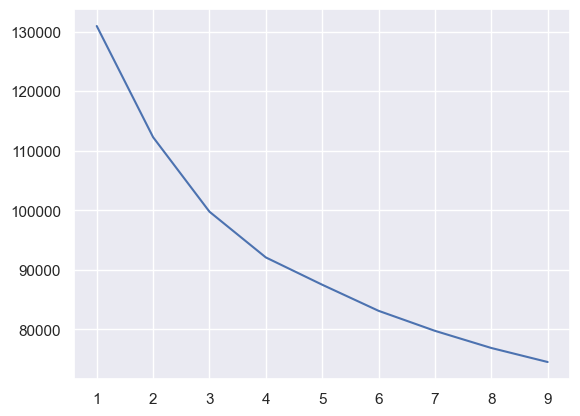

In [9]:
plt.plot([i for i in range(1,10)], wcss)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
sc_x_pca = pca.fit_transform(sc_x)

print(sc_x.shape)
print(sc_x_pca.shape)


(5456, 24)
(5456, 21)


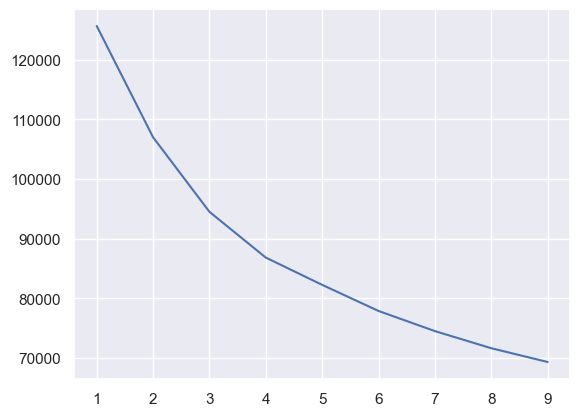

In [12]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1, 10):
    km = KMeans(n_clusters=i, random_state=101)
    km.fit(sc_x_pca)
    wcss.append(km.inertia_)

plt.plot([i for i in range(1,10)], wcss)

# Bank dataset

In [13]:
bank_ds = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/Bank-data.csv')
bank_ds.head()

,Index,interest_rate,credit,Gender,previous,duration,Churn
0,0,1.334,0,1,0,117,no
1,1,0.767,0,0,1,274,yes
2,2,4.858,0,1,0,167,no
3,3,4.120,0,0,0,686,yes
4,4,4.856,0,1,0,159,no


In [18]:
bank_ds.drop(columns=['Index'], inplace=True)

In [19]:
bank_ds.isnull().sum()

interest_rate    0
credit           0
Gender           0
previous         0
duration         0
Churn            0
dtype: int64

In [20]:
bank_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   interest_rate  518 non-null    float64
 1   credit         518 non-null    int64  
 2   Gender         518 non-null    int64  
 3   previous       518 non-null    int64  
 4   duration       518 non-null    int64  
 5   Churn          518 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 24.4+ KB


In [21]:
x = bank_ds.drop(columns=['Churn'])

In [22]:
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-0.83643824, -0.18973666,  1.65124762, -0.38212262, -0.77850438],
       [-1.13856587, -0.18973666, -0.60560269,  2.61696099, -0.32116532],
       [ 1.04133564, -0.18973666,  1.65124762, -0.38212262, -0.632855  ],
       ...,
       [-1.07888634, -0.18973666, -0.60560269, -0.38212262, -0.27455752],
       [-1.07995205, -0.18973666, -0.60560269,  2.61696099,  0.25851922],
       [ 1.0983509 , -0.18973666, -0.60560269, -0.38212262, -0.70567969]])

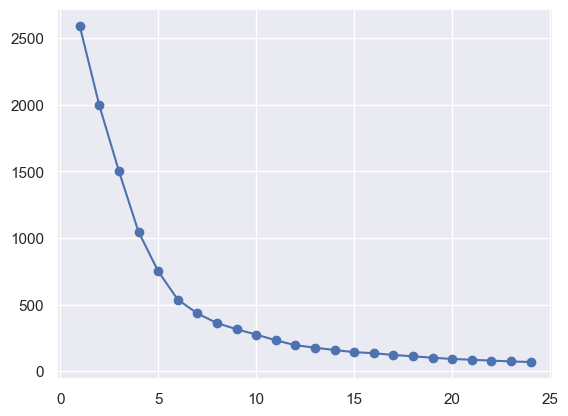

In [30]:
wcss=[]

for i in range(1, 25):
    km = KMeans(n_clusters=i, random_state=101)
    km.fit(sc_x)
    wcss.append(km.inertia_)

plt.plot([i for i in range(1,25)], wcss, marker='o')

In [31]:
# Lets take k=6

km = KMeans(n_clusters=6, random_state=143)
km.fit(sc_x)
labels = km.labels_
labels

array([5, 3, 5, 1, 5, 2, 1, 5, 1, 1, 3, 1, 3, 1, 1, 2, 3, 4, 5, 1, 2, 3,
       5, 1, 3, 5, 1, 1, 1, 1, 1, 5, 5, 2, 1, 5, 0, 1, 4, 5, 1, 2, 1, 5,
       3, 2, 5, 5, 5, 2, 1, 1, 1, 1, 5, 3, 1, 3, 2, 3, 1, 5, 2, 2, 1, 5,
       1, 1, 3, 1, 1, 2, 1, 4, 2, 5, 2, 5, 5, 1, 3, 2, 3, 1, 1, 0, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 5, 1, 2, 3, 5,
       4, 2, 5, 1, 2, 1, 1, 5, 5, 1, 5, 5, 3, 0, 5, 0, 4, 2, 2, 2, 1, 5,
       2, 1, 2, 5, 1, 2, 1, 5, 5, 5, 5, 2, 5, 4, 5, 5, 0, 2, 0, 1, 0, 5,
       1, 4, 1, 0, 3, 0, 3, 2, 0, 1, 2, 1, 1, 2, 5, 1, 5, 3, 3, 1, 1, 0,
       2, 4, 2, 4, 1, 5, 1, 1, 1, 1, 5, 1, 0, 2, 2, 5, 5, 5, 3, 1, 2, 1,
       2, 2, 1, 1, 3, 2, 1, 1, 4, 1, 5, 0, 2, 5, 2, 2, 1, 1, 3, 4, 2, 5,
       4, 2, 1, 5, 5, 5, 1, 4, 0, 0, 1, 5, 1, 0, 1, 0, 2, 5, 5, 2, 1, 4,
       5, 5, 0, 0, 3, 1, 0, 4, 1, 2, 5, 1, 1, 2, 3, 5, 2, 1, 2, 2, 0, 1,
       2, 1, 5, 5, 1, 1, 5, 2, 1, 1, 0, 2, 2, 5, 5, 5, 1, 5, 0, 0, 1, 0,
       1, 0, 1, 2, 1, 2, 5, 2, 2, 1, 3, 5, 1, 2, 5,

In [33]:
y_kmeans = km.fit_predict(x)
y_kmeans

array([3, 5, 3, 1, 3, 3, 5, 1, 1, 0, 5, 5, 5, 3, 5, 5, 3, 3, 5, 1, 1, 0,
       5, 5, 5, 3, 5, 5, 0, 3, 3, 3, 1, 5, 3, 3, 2, 3, 2, 0, 3, 5, 3, 3,
       3, 3, 3, 3, 3, 5, 1, 3, 3, 3, 3, 5, 3, 3, 1, 0, 3, 3, 1, 5, 5, 5,
       3, 3, 1, 3, 3, 5, 5, 5, 0, 3, 5, 0, 3, 3, 5, 5, 3, 5, 5, 2, 3, 0,
       5, 3, 5, 3, 5, 3, 0, 1, 1, 3, 2, 3, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5,
       0, 3, 3, 3, 0, 3, 3, 1, 0, 5, 3, 3, 5, 2, 5, 2, 5, 0, 5, 5, 3, 5,
       5, 1, 5, 0, 0, 5, 5, 3, 3, 3, 1, 5, 1, 0, 5, 3, 4, 3, 2, 0, 2, 1,
       3, 3, 1, 2, 1, 2, 5, 0, 1, 5, 3, 5, 3, 3, 3, 0, 0, 5, 5, 3, 3, 2,
       5, 3, 0, 5, 5, 3, 5, 1, 3, 5, 3, 3, 4, 3, 5, 0, 3, 0, 5, 3, 0, 3,
       0, 5, 3, 1, 5, 1, 3, 5, 5, 1, 5, 2, 5, 5, 1, 5, 3, 1, 1, 3, 5, 3,
       0, 0, 3, 3, 1, 5, 1, 3, 2, 2, 0, 5, 0, 1, 1, 2, 5, 5, 5, 0, 3, 0,
       3, 3, 2, 2, 0, 3, 1, 0, 3, 1, 3, 3, 3, 0, 5, 3, 0, 0, 0, 1, 2, 5,
       3, 3, 5, 3, 0, 0, 1, 0, 0, 3, 2, 5, 0, 3, 5, 5, 1, 3, 1, 4, 5, 2,
       3, 2, 5, 5, 3, 5, 0, 3, 5, 3, 3, 3, 3, 1, 5,

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(sc_x, labels, random_state=143)

0.5611724770980228

In [37]:
plt.scatter( x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label='Cluster1' )
plt.scatter( x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='yellow', label='Cluster2' )
plt.scatter( x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Cluster3' )
plt.scatter( x[y_kmeans==3,0], x[y_kmeans==3,1], s=100, c='black', label='Cluster4' )
plt.scatter( x[y_kmeans==4,0], x[y_kmeans==4,1], s=100, c='pink', label='Cluster5' )
plt.scatter( x[y_kmeans==5,0], x[y_kmeans==5,1], s=100, c='blue', label='Cluster6' )


plt.show()

InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False,  True,  True,
       False, False,  True, False,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False, False, False,  True, False]), 0)